# **TOPIK 8**

# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat.
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- SQL Injection Detection with Transformer Models in Web Applications
Topik Riset:
"Deteksi SQL Injection di Aplikasi Web Menggunakan Model Transformer: Pendekatan Pembelajaran Kontekstual"
Deskripsi:
Transformer digunakan untuk mendeteksi SQL Injection berdasarkan pola permintaan HTTP. Model ini mempelajari urutan query SQL dan input form yang berpotensi berbahaya, membedakan permintaan normal dari upaya injeksi SQL melalui analisis konteks dan sekuens input.
Novelty: Sedang. Deteksi SQL injection telah banyak dibahas dalam literatur menggunakan berbagai metode. Menggunakan Transformer untuk mengenali pola anomali dalam query mungkin memberikan peningkatan, tetapi novelty-nya akan lebih tinggi jika model tersebut digabungkan dengan pendekatan baru seperti unsupervised learning atau real-time detection.




# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [2]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Importing Datasets**

Memuat dataset:

Dataset dimuat ke dalam variabel data.

In [3]:
data = pd.read_excel('Modified_SQL_Dataset.xlsx')

Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [4]:
data.head(n=5)


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [5]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['Label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


Label
0    19537
1    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

In [6]:
print(data.columns)


Index(['Query', 'Label'], dtype='object')


In [7]:
print(data['Label'].value_counts())


Label
0    19537
1    11382
Name: count, dtype: int64


Index(['Query', 'Label'], dtype='object')
Label
normal         19537
injeksi SQL    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


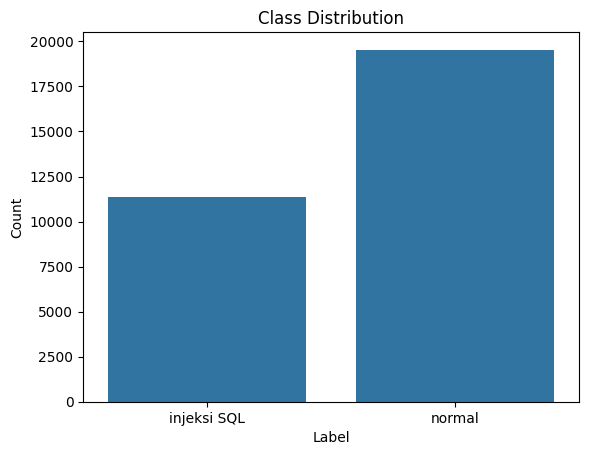

C:\Users\naufa\AppData\Local\Temp\ipykernel_16812\2292101930.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names
print(data.columns)

# Replace 0 and 1 with 'normal' and 'DDoS'
data['Label'] = data['Label'].replace({0: 'normal', 1: 'injeksi SQL'})

# Visualize the class distribution
kelas = data['Label'].value_counts()
print(kelas)

jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualize the class distribution
sns.countplot(x='Label', data=data)  # Adjust 'Label' if needed
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Convert back to numerical labels for modeling
data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})


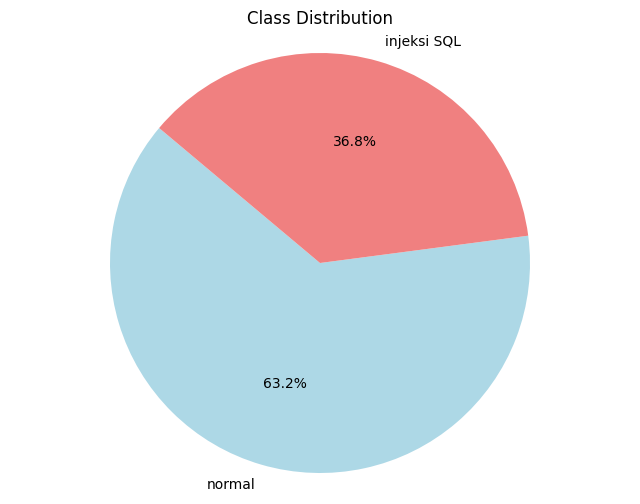

In [24]:
# Visualize the class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas, labels=kelas.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


Query    object
dtype: object


C:\Users\naufa\AppData\Local\Temp\ipykernel_16812\668456158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Query'] = X['Query'].astype(str)
C:\Users\naufa\AppData\Local\Temp\ipykernel_16812\668456158.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


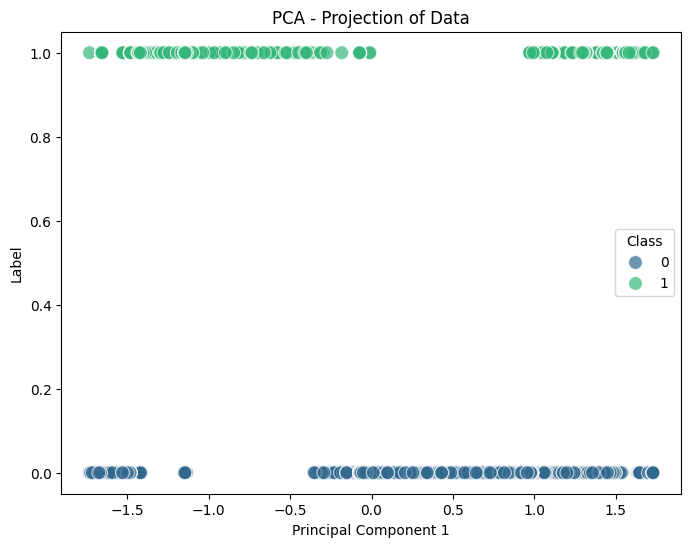

In [9]:
# Periksa kolom yang ada pada dataset
# Assuming 'Query' is the feature column in your DataFrame 'data'
X = data[['Query']]  # Create X with the relevant feature columns
print(X.dtypes)

# Convert the 'Query' column to string type
X['Query'] = X['Query'].astype(str)

# Identifikasi kolom yang berisi teks atau data kategorikal
# Misalnya, kita asumsikan beberapa kolom kategorikal perlu dikonversi ke numerik

# Anda dapat mengubah kolom kategorikal menggunakan encoding, contohnya Label Encoding
# Misalkan 'kolom_teks' adalah kolom yang mengandung string dan perlu diubah
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Misalnya kolom bernama 'kolom_teks', ganti dengan nama kolom yang tepat
# Cek apakah ada kolom dengan tipe 'object' yang tidak dapat digunakan oleh PCA
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# After this, make sure to define 'y' (target variable) before using it
# For example, if 'Label' is your target column:
y = data['Label']

# --- Assuming you have X_scaled defined somewhere before this part ---
# If not, you'll need to scale your data before applying PCA
# For example:
from sklearn.preprocessing import StandardScaler # Make sure to import this
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Assuming X contains only numerical features after encoding

# Terapkan PCA seperti sebelumnya
from sklearn.decomposition import PCA # Make sure to import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled) # Use X_scaled, which is the scaled data

# Buat DataFrame untuk hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1'])
pca_df['Label'] = y

# Visualisasikan hasil PCA
plt.figure(figsize=(8, 6))
# Changed 'PCA2' to 'Label' to plot PCA1 against the Label
sns.scatterplot(x='PCA1', y='Label', hue='Label', data=pca_df, palette='viridis', s=100, alpha=0.7) 
plt.title('PCA - Projection of Data')
plt.xlabel('Principal Component 1')
# Changed y-axis label to match the new column
plt.ylabel('Label')  
plt.legend(title='Class')
plt.show()

# **DATA SPLITTING**

In [10]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



In [11]:
# Replace np.nan values in the 'Query' column with an empty string before vectorization
data['Query'] = data['Query'].astype(str).fillna('') # Converts the entire column to string type

# Label Encoding untuk target (Label)
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Mengonversi teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Ambil 5000 fitur teratas (token yang paling sering muncul)
X = vectorizer.fit_transform(data['Query']).toarray()  # Fit dan transform kolom 'Query'

y = data['Label_encoded'].values
print(f'X shape: {X.shape}')

X shape: (30919, 5000)


In [12]:
# SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'X_res shape: {X_res.shape}')


X_res shape: (39074, 5000)


In [13]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [14]:
# Menampilkan jumlah data untuk train dan test
print(f'Jumlah data latih (X_train): {X_train.shape[0]}')  # Menampilkan jumlah baris (data) di train
print(f'Jumlah data uji (X_test): {X_test.shape[0]}')  # Menampilkan jumlah baris (data) di test


Jumlah data latih (X_train): 31259
Jumlah data uji (X_test): 7815


In [15]:
print(f'Jumlah label latih (y_train): {y_train.shape[0]}')
print(f'Jumlah label uji (y_test): {y_test.shape[0]}')


Jumlah label latih (y_train): 31259
Jumlah label uji (y_test): 7815


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [16]:
!pip install transformers tensorflow scikit-learn matplotlib pandas



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install transformers torch scikit-learn



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1. TRANSFORMER "ENCODER"**

# **CLASSIFICATION Non-Tuning**

ini dirunning sendiri ya

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization to convert SQL queries to numerical data
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(data['Query']).toarray()


In [21]:
# Set a better SMOTE configuration to handle class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights_tensor = torch.FloatTensor(class_weights)


In [22]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=512, nhead=16, num_layers=8, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)


Fold 1
Accuracy for fold 1: 98.67%
F1 Score for fold 1: 0.9867
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1970
           1       0.98      0.98      0.98      1122

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



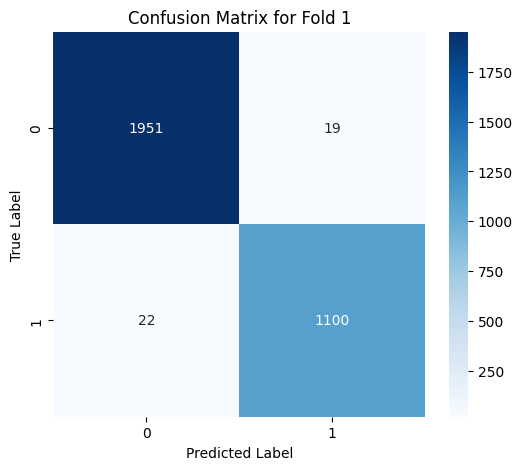

Fold 2
Accuracy for fold 2: 98.93%
F1 Score for fold 2: 0.9893
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2004
           1       0.99      0.98      0.98      1088

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



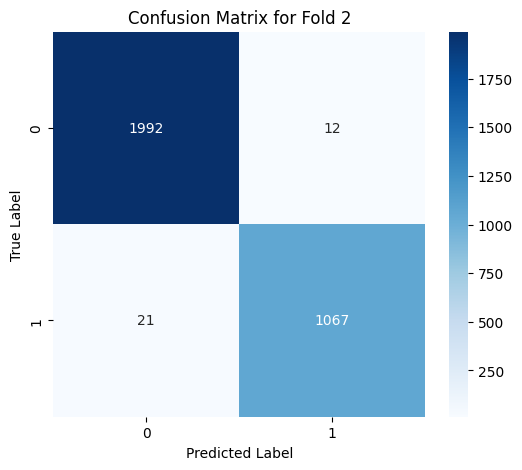

Fold 3
Accuracy for fold 3: 99.19%
F1 Score for fold 3: 0.9919
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1965
           1       0.99      0.99      0.99      1127

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



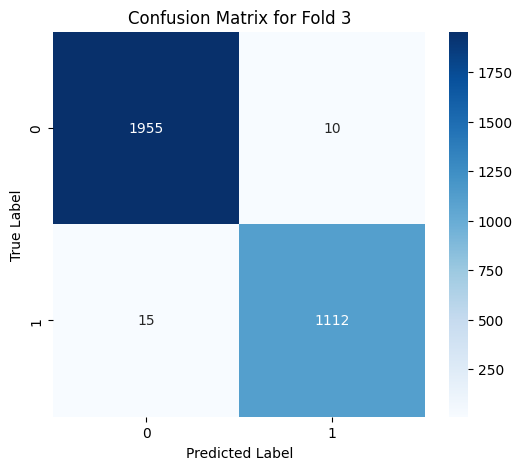

Fold 4
Accuracy for fold 4: 98.74%
F1 Score for fold 4: 0.9874
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1931
           1       0.98      0.98      0.98      1161

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



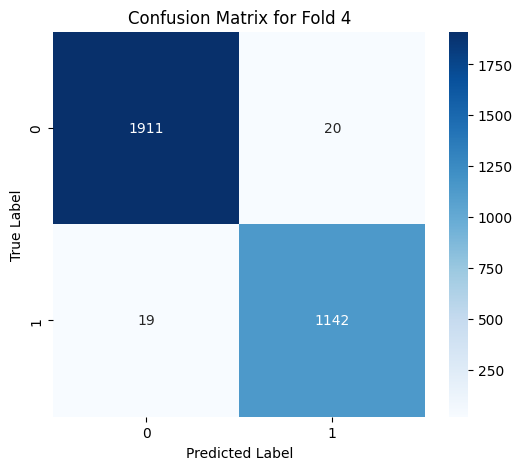

Fold 5
Accuracy for fold 5: 99.03%
F1 Score for fold 5: 0.9903
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1949
           1       0.99      0.99      0.99      1143

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



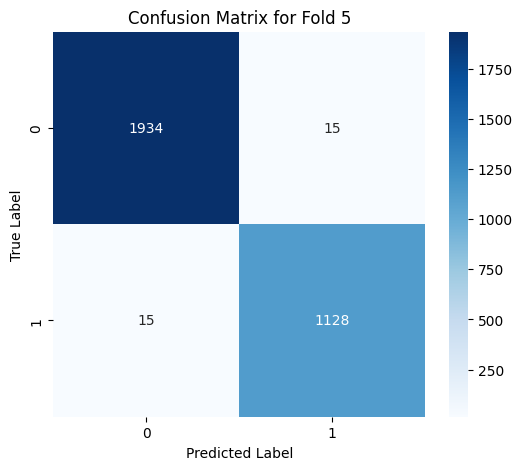

Fold 6
Accuracy for fold 6: 98.71%
F1 Score for fold 6: 0.9871
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1910
           1       0.98      0.99      0.98      1182

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



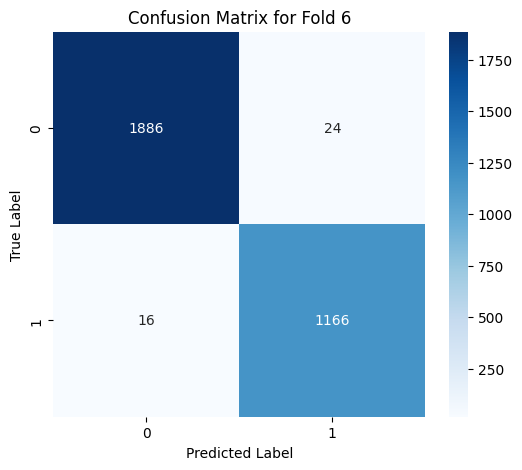

Fold 7
Accuracy for fold 7: 98.77%
F1 Score for fold 7: 0.9877
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1951
           1       0.98      0.99      0.98      1141

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



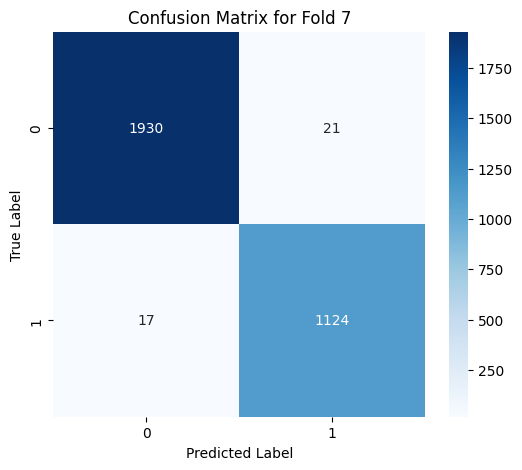

Fold 8
Accuracy for fold 8: 98.67%
F1 Score for fold 8: 0.9867
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1976
           1       0.98      0.98      0.98      1116

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



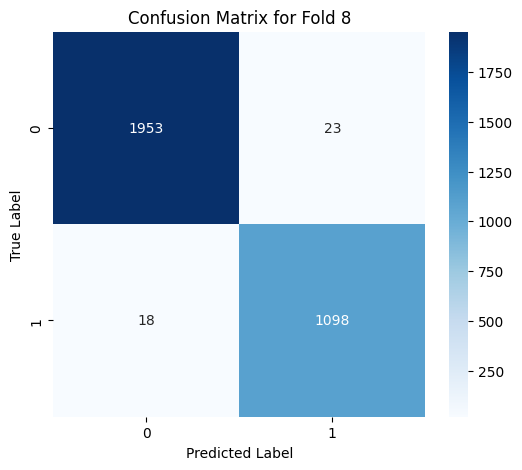

Fold 9
Accuracy for fold 9: 98.74%
F1 Score for fold 9: 0.9874
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1948
           1       0.99      0.98      0.98      1144

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



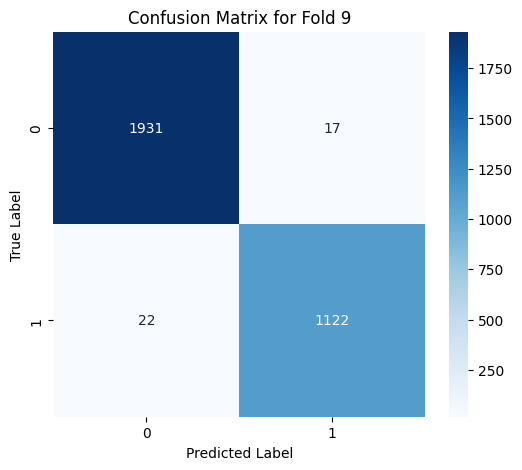

Fold 10
Accuracy for fold 10: 98.96%
F1 Score for fold 10: 0.9896
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.98      0.99      1158

    accuracy                           0.99      3091
   macro avg       0.99      0.99      0.99      3091
weighted avg       0.99      0.99      0.99      3091



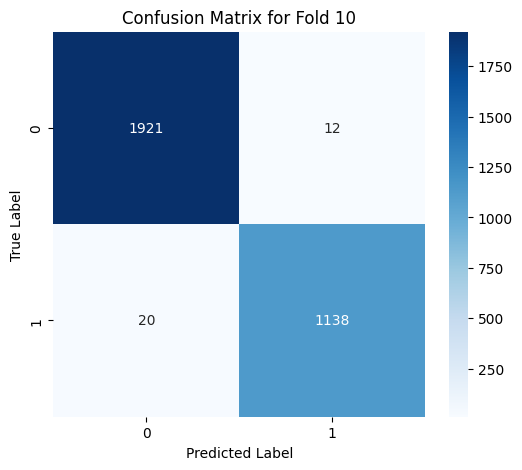

Average Accuracy: 98.84%
Average F1 Score: 0.9884


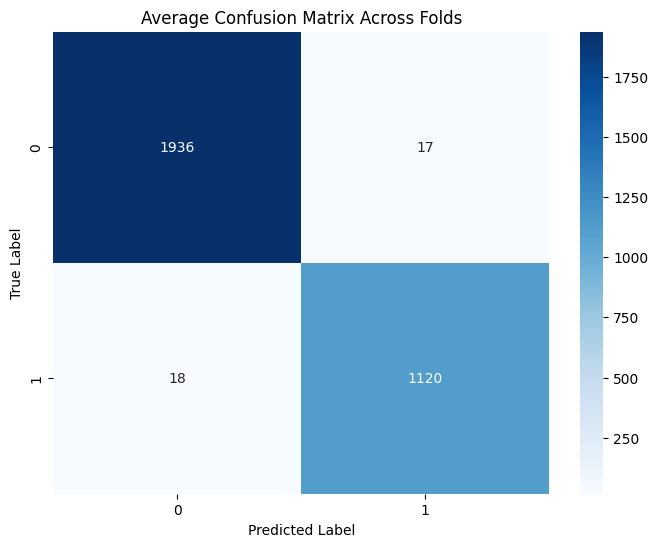

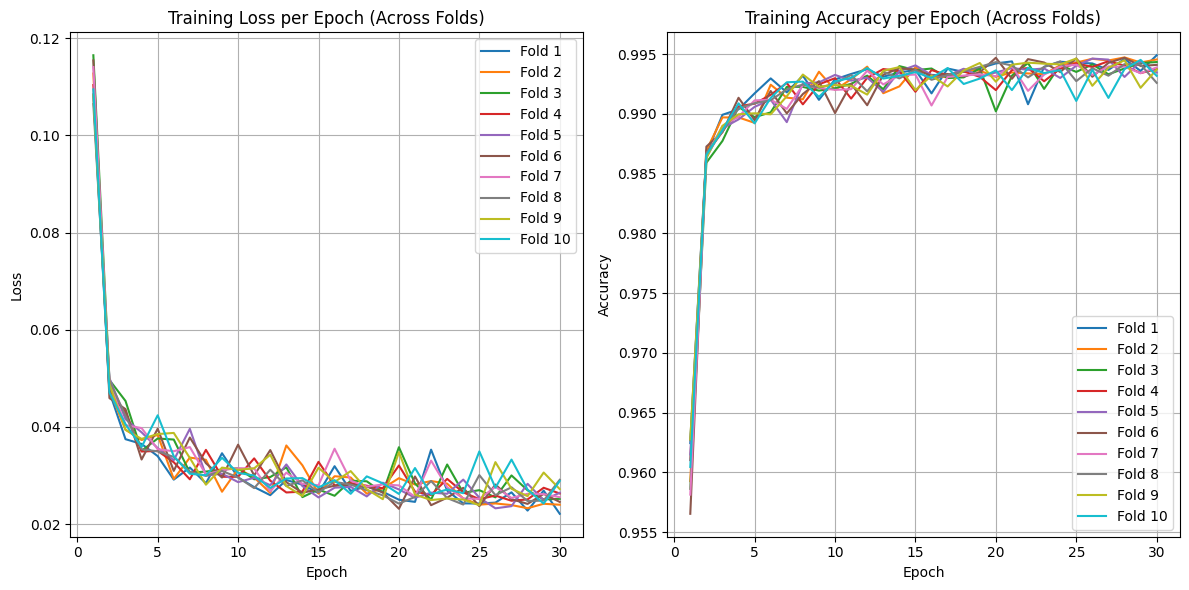

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Label Encoding
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = label_encoder.classes_

kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

# Tracking losses and accuracies across all folds
all_epoch_losses = []  # List to store losses for all folds
all_epoch_accuracies = []  # List to store accuracies for all folds

for fold, (train_index, val_index) in enumerate(kf.split(X_tfidf)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_tfidf[train_index], X_tfidf[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # SMOTE for handling class imbalance
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Model Setup
    model = TransformerModel(input_dim=X_train_res.shape[1], num_classes=2, d_model=128, nhead=4, num_layers=4)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_res)
    y_train_tensor = torch.LongTensor(y_train_res)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val.values)

    # DataLoader setup
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Tracking variables for loss and accuracy for this fold
    fold_losses = []
    fold_accuracies = []

    # Training loop
    for epoch in range(30):  # Change epochs as needed
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            # Accuracy
            _, y_pred = torch.max(outputs, 1)
            correct += (y_pred == labels).sum().item()
            total += labels.size(0)

        fold_losses.append(epoch_loss / len(train_loader))  # Average loss per epoch
        fold_accuracies.append(correct / total)  # Accuracy per epoch

    all_epoch_losses.append(fold_losses)  # Store losses of this fold
    all_epoch_accuracies.append(fold_accuracies)  # Store accuracies of this fold

    # Validation and metrics
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val_tensor)
        _, y_pred = torch.max(outputs_val, 1)

    accuracy = accuracy_score(y_val, y_pred.numpy())
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_accuracy.append(accuracy)
    all_f1_scores.append(f1)

    # Confusion Matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)

    # Print Metrics and Classification Report for this fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val, y_pred.numpy(), target_names=[str(cls) for cls in class_names]))

    # Plot Confusion Matrix for this fold
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot Average Accuracy and F1 Score
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Confusion Matrix Plot (Average across all folds)
avg_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.0f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Average Confusion Matrix Across Folds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Loss and Accuracy Graphs across Epochs**
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
for i, losses in enumerate(all_epoch_losses):
    plt.plot(range(1, len(losses) + 1), losses, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch (Across Folds)')
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
for i, accuracies in enumerate(all_epoch_accuracies):
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch (Across Folds)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# **TESTING DATA**

Pengujian Data Preprocessing

In [23]:
# Test 1: Check if all labels are encoded correctly
def test_label_encoding(data):
    unique_labels = data['Label'].unique()
    expected_labels = [0, 1]  # Assuming 0 for 'normal' and 1 for 'injeksi SQL'
    assert set(unique_labels) == set(expected_labels), f"Unexpected labels found: {unique_labels}"

# Run test
test_label_encoding(data)
print("Test 1 passed: Label encoding is correct.")


Test 1 passed: Label encoding is correct.


Pengujian Distribusi Kelas

In [25]:
# Test 2: Check class distribution
def test_class_distribution(data):
    class_counts = data['Label'].value_counts()
    assert class_counts.sum() == len(data), "Total count mismatch."
    print(f"Class counts: {class_counts}")

# Run test
test_class_distribution(data)


Class counts: Label
0    19537
1    11382
Name: count, dtype: int64


Pengujian Fitur Data

In [32]:
# Test 3: Check for missing values and data types
def test_data_integrity(data):
    assert data.isnull().sum().sum() == 0, "Missing values found."
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        raise AssertionError(f"Non-numeric features found: {list(non_numeric_columns)}")



Pengujian Model

In [34]:
# Identifikasi baris dengan nilai string
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Kolom '{col}' mengandung nilai non-numerik:")
        print(X[col].unique())


In [35]:
# Contoh perbaikan nilai string ke numerik
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].str.extract('(\d+)')  # Ekstrak angka dari string
        X[col] = pd.to_numeric(X[col], errors='coerce')  # Konversi ke numerik


In [36]:
# Pastikan tidak ada nilai string
assert all(X.dtypes != 'object'), "Masih terdapat nilai non-numerik dalam data."
assert X.isnull().sum().sum() == 0, "Masih ada nilai kosong setelah konversi."


In [37]:
# Split ulang data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Jalankan ulang pengujian model
test_model_performance(X_train, X_test, y_train, y_test)


Test 4 passed: Model accuracy is 1.00


In [18]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' mempertimbangkan ketidakseimbangan kelas
report = classification_report(y_test, y_pred)

# Tampilkan hasil
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")
print(f"F1 Score on Test Data: {f1:.4f}")
print("Classification Report on Test Data:")
print(report)



Accuracy on Test Data: 99.56%
F1 Score on Test Data: 0.9956
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      1.00      6184
weighted avg       1.00      1.00      1.00      6184



Confusion Matrix on Test Data:
[[3891    2]
 [  25 2266]]


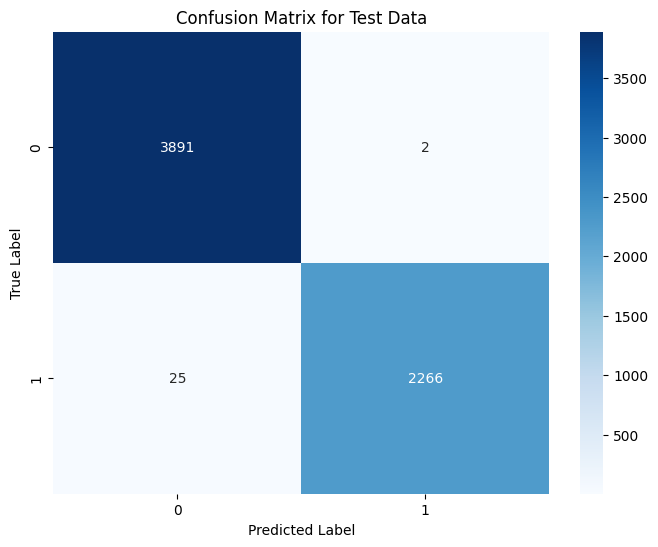

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk array
print("Confusion Matrix on Test Data:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()
